In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_order_historic_demand = pd.read_excel('../Datos_P1/df_historic_order_demand.xlsx')
df_distance_km = pd.read_excel('../Datos_P1/df_distance_km.xlsx')
df_distance_min = pd.read_excel('../Datos_P1/df_distance_min.xlsx')
df_location = pd.read_excel('../Datos_P1/df_location.xlsx')
df_orders = pd.read_excel('../Datos_P1/df_orders.xlsx')
df_vehicle = pd.read_excel('../Datos_P1/df_vehicle.xlsx')
print(df_location)


       Cliente    Latitud  Longitud
0    Cliente_1  40.402828 -3.696878
1    Cliente_2  40.455820 -3.700350
2    Cliente_3  40.471840 -3.708079
3    Cliente_4  40.404688 -3.706262
4    Cliente_5  40.371990 -3.695056
5    Cliente_6  40.400481 -3.712361
6    Cliente_7  40.457059 -3.703511
7    Cliente_8  40.446872 -3.586515
8    Cliente_9  40.389637 -3.735354
9   Cliente_10  40.409083 -3.676125
10  Cliente_11  40.389388 -3.700416
11  Cliente_12  40.411792 -3.659367
12  Cliente_13  40.434331 -3.704534
13  Cliente_14  40.386264 -3.690862
14  Cliente_15  40.426543 -3.608051
15  Cliente_16  40.406191 -3.698875
16  Cliente_17  40.334024 -3.711849
17  Cliente_18  40.434710 -3.642266
18  Cliente_19  40.512445 -3.677859
19  Cliente_20  40.467850 -3.814595
20     Almacén  40.388596 -3.727038


In [4]:
df_location.drop(20, inplace=True)

In [5]:
# Activar múltiples hilos en el computador, para un cálculo más rápido

%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [6]:
clients = []
for i, row in df_location.iterrows():
    clients.append((row['Latitud'], row['Longitud']))

clients

[(40.4028283, -3.696878),
 (40.4558202, -3.7003498),
 (40.4718405, -3.7080787),
 (40.4046876, -3.7062622),
 (40.3719903, -3.6950556),
 (40.4004807, -3.712361),
 (40.4570586, -3.7035106),
 (40.4468717, -3.5865153),
 (40.3896366, -3.7353538),
 (40.4090831, -3.676125),
 (40.3893878, -3.7004158),
 (40.4117919, -3.6593671),
 (40.4343313, -3.7045345),
 (40.3862643, -3.6908621),
 (40.4265429, -3.6080509),
 (40.4061912, -3.6988754),
 (40.3340239, -3.7118486),
 (40.4347103, -3.6422656),
 (40.5124455, -3.6778586),
 (40.4678501, -3.8145949)]

mejor ruta [[3, 17, 11, 16], [8, 10, 13], [4, 5, 9], [7, 18, 19], [2, 6, 1], [14, 12, 15]] y coste 95.273 por la generacion 1
Generación 1: Mejor costo = 95.273
mejor ruta [[3, 17, 11, 9], [8, 12, 13], [4, 5, 16], [7, 18, 19], [2, 6, 1], [14, 10, 15]] y coste 95.273 por la generacion 2
Generación 2: Mejor costo = 95.273
mejor ruta [[3, 17, 11, 9], [8, 12, 13], [4, 5, 6], [7, 18, 19], [2, 16, 1], [14, 10, 15]] y coste 95.273 por la generacion 3
Generación 3: Mejor costo = 106.06750000000001
mejor ruta [[3, 17, 11, 9], [8, 12, 13], [4, 5, 6], [7, 18, 19], [2, 16, 1], [14, 10, 15]] y coste 95.273 por la generacion 4
Generación 4: Mejor costo = 143.9503
mejor ruta [[3, 17, 11, 9], [8, 12, 13], [4, 5, 6], [7, 18, 19], [2, 16, 1], [14, 10, 15]] y coste 95.273 por la generacion 5
Generación 5: Mejor costo = 143.9503
mejor ruta [[3, 17, 11, 9], [8, 12, 13], [1, 5, 6], [7, 18, 19], [2, 16, 4], [14, 10, 15]] y coste 95.273 por la generacion 6
Generación 6: Mejor costo = 143.9503
mejor ruta [[3, 

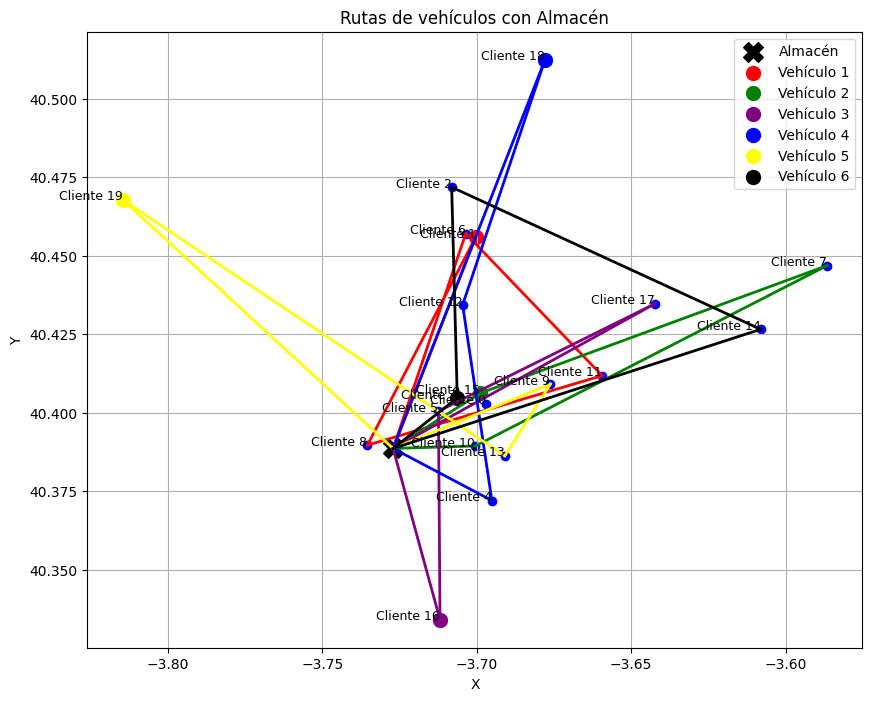

In [20]:
import random
import numpy as np

# Parámetros del problema
num_vehicles = 6        # Número de vehículos
num_clients = 19         # Número de clientes
max_capacity = 10       # Capacidad máxima por vehículo

Almacen = (-3.7270384, 40.3885963)

client_positions = []
for i, row in df_location.iterrows():
    client_positions.append((row['Longitud'], row['Latitud']))

    

# Definir la matriz de distancias entre clientes (por ejemplo, matriz de distancias Euclidianas)
distances = df_distance_km.to_numpy()
distances = np.delete(distances, -1,  axis=0)

# Función para calcular el costo de una ruta
def calculate_route_cost(route):
    cost = 0
    for i in range(len(route) - 1):
        cost += distances[route[i], route[i + 1]]
    return cost

# Función de aptitud (evaluación)
def fitness(route):
    total_cost = 0
    for vehicle_route in route:
        total_cost += calculate_route_cost(vehicle_route)
    return total_cost

# Función para crear una población inicial aleatoria
def create_initial_population(pop_size, random_state=None):

    if random_state is not None:
        random.seed(random_state)  # Fijamos el estado aleatorio
        np.random.seed(random_state)
        
    population = []
    for _ in range(pop_size):
        route = []
        clients = list(range(1, num_clients + 1))  # Clientes de 1 a num_clients
        random.shuffle(clients)
        
        # Dividir los clientes entre los vehículos
        for i in range(num_vehicles):
            route.append(clients[i::num_vehicles])
        
        # Verificamos que cada cliente solo esté en una ruta
        if is_valid_route(route):
            population.append(route)
    return population

# Función para verificar si la ruta es válida (sin duplicados)
def is_valid_route(route):
    all_clients = [client for vehicle_route in route for client in vehicle_route]
    return len(all_clients) == len(set(all_clients))

# Función de selección por torneo
def tournament_selection(population, fitness_values, tournament_size=3):
    selected = random.sample(list(zip(population, fitness_values)), tournament_size)
    selected = sorted(selected, key=lambda x: x[1])  # Ordenamos por aptitud (menor es mejor)
    return selected[0][0]

# Crossover de 2 puntos (sin duplicados)
def crossover(parent1, parent2):
    size = len(parent1)
    point1, point2 = sorted(random.sample(range(size), 2))
    
    child = [None] * size
    child[point1:point2] = parent1[point1:point2]
    
    p2_index = 0
    for i in range(size):
        if child[i] is None:
            while parent2[p2_index] in child:
                p2_index += 1
            child[i] = parent2[p2_index]
    
    # Verificamos si la ruta es válida
    if is_valid_route(child):
        return child
    else:
        return parent1  # Si la ruta no es válida, devolvemos el primer padre

# Mutación por intercambio (sin duplicados)
def mutate(route, mutation_rate=0.1):
    if random.random() < mutation_rate:
        # Seleccionamos dos vehículos al azar y realizamos un intercambio entre ellos
        vehicle1, vehicle2 = random.sample(range(len(route)), 2)
        client1, client2 = random.sample(range(len(route[vehicle1])), 1)[0], random.sample(range(len(route[vehicle2])), 1)[0]
        
        # Intercambiamos los clientes
        route[vehicle1][client1], route[vehicle2][client2] = route[vehicle2][client2], route[vehicle1][client1]
    
    # Verificamos si la mutación resultó en una solución válida
    if is_valid_route(route):
        return route
    else:
        return route  # Si no es válida, devolvemos la ruta original

# Algoritmo genético
def genetic_algorithm(pop_size, generations, random_state=None):
    population = create_initial_population(pop_size, random_state=random_state)
    
    # Inicializamos la mejor solución global
    best_solution = None
    best_cost = float('inf')
    
    for generation in range(generations):
        fitness_values = [fitness(route) for route in population]
        
        # Mantenemos la mejor solución de la generación actual
        current_best_cost = min(fitness_values)
        current_best_solution = population[fitness_values.index(current_best_cost)]

        # Si encontramos una mejor solución, la actualizamos
        if current_best_cost < best_cost:
            best_cost = current_best_cost
            best_solution = current_best_solution
        
        new_population = []
        
        # Selección, cruzamiento y mutación
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, fitness_values)
            parent2 = tournament_selection(population, fitness_values)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            
            # Mutación
            child1 = mutate(child1)
            child2 = mutate(child2)
            
            new_population.append(child1)
            new_population.append(child2)
        
        print(f"mejor ruta {best_solution} y coste {best_cost} por la generacion {generation + 1}")
        # Actualizamos la población
        population = new_population
        print(f"Generación {generation + 1}: Mejor costo = {current_best_cost}")
    
    # Retornamos la mejor solución encontrada
    return best_solution, best_cost

# Función para visualizar las rutas en un mapa
def plot_routes(solution):
    plt.figure(figsize=(10, 8))

    plt.scatter(*Almacen, c='black', marker='X', s=200, label='Almacén')

    # Mostrar las posiciones de los clientes
    for i, pos in enumerate(client_positions):
        plt.scatter(*pos, c='blue')
        plt.text(pos[0], pos[1], f'Cliente {i}', fontsize=9, ha='right')
    
    # Mostrar las rutas de los vehículos
    colors = ['red', 'green', 'purple', 'blue', 'yellow', 'black']  # Asignamos colores diferentes a cada vehículo
    for vehicle_idx, vehicle_route in enumerate(solution):
        route_color = colors[vehicle_idx % len(colors)]
        full_route = [Almacen] + [client_positions[client] for client in vehicle_route] + [Almacen]

        for i in range(len(full_route) - 1):
            client1 = full_route[i]
            client2 = full_route[i + 1]
            plt.plot([client1[0], client2[0]], [client1[1], client2[1]], color=route_color, lw=2)
        # Dibujar la ruta del vehículo
        plt.scatter(full_route[1][0], full_route[1][1], color=route_color, marker='o', s=100, label=f'Vehículo {vehicle_idx + 1}')
    
    plt.title('Rutas de vehículos con Almacén')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejecutar el algoritmo genético
best_solution, best_cost = genetic_algorithm(pop_size=10, generations=200, random_state=1337)
print("Mejor solución encontrada:", best_solution)
print("Costo total:", best_cost)


for vehicle_route in best_solution:
    print("Ruta del vehículo:", [client_positions[client] for client in vehicle_route])

plot_routes(best_solution)


In [10]:
print(distances[19])

[22.1445 19.1038 16.5997 21.1518 25.5947 20.4797 17.1722 34.1368 22.9781
 21.1407 22.484  22.5962 17.7187 23.8969 37.006  21.0351 30.6412 24.3734
 24.1215  0.     14.8282]
